In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Portfolio/Employee Churn Model/employee_churn.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Preprocessing

In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.std().sort_values(ascending=False)

<ipython-input-5-dacd23b87731>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std().sort_values(ascending=False)


MonthlyRate                 7117.786044
MonthlyIncome               4707.956783
EmployeeNumber               602.024335
DailyRate                    403.509100
HourlyRate                    20.329428
Age                            9.135373
DistanceFromHome               8.106864
TotalWorkingYears              7.780782
YearsAtCompany                 6.126525
PercentSalaryHike              3.659938
YearsInCurrentRole             3.623137
YearsWithCurrManager           3.568136
YearsSinceLastPromotion        3.222430
NumCompaniesWorked             2.498009
TrainingTimesLastYear          1.289271
JobLevel                       1.106940
JobSatisfaction                1.102846
EnvironmentSatisfaction        1.093082
RelationshipSatisfaction       1.081209
Education                      1.024165
StockOptionLevel               0.852077
JobInvolvement                 0.711561
WorkLifeBalance                0.706476
PerformanceRating              0.360824
StandardHours                  0.000000


In [6]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
df.value_counts(df['Attrition'])

Attrition
No     1233
Yes     237
dtype: int64

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
'''
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)
'''

"\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy='most_frequent')\nX = imputer.fit_transform(X)\n"

In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Display count of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

# Show the duplicate rows
duplicate_df = df[duplicate_rows]
print("Duplicate rows:")
print(duplicate_df)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


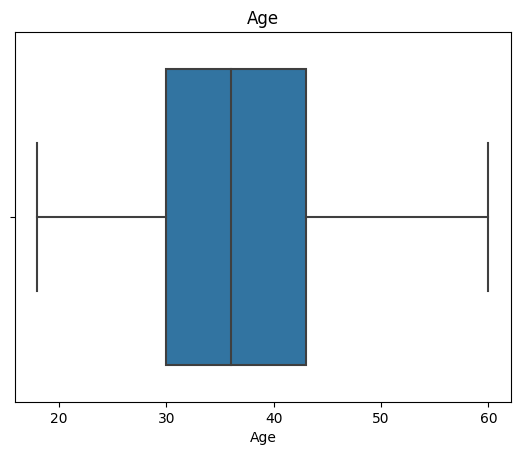

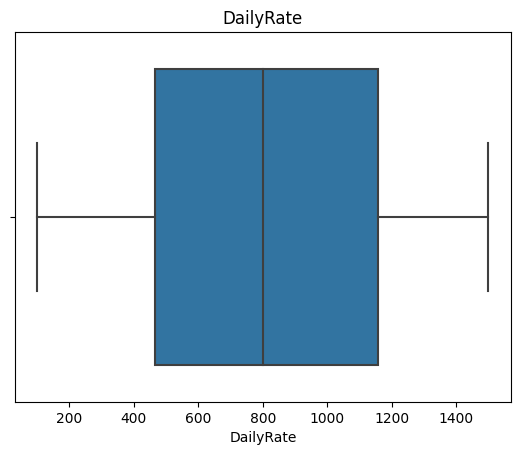

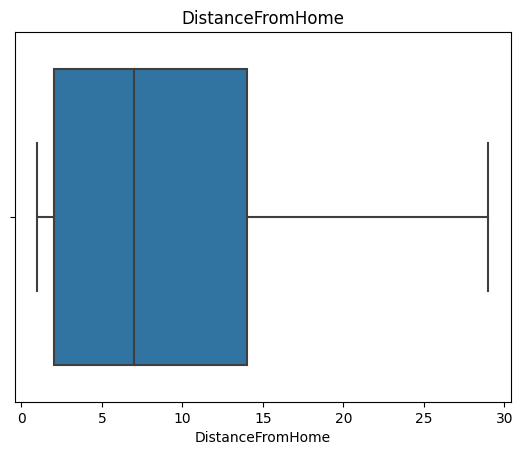

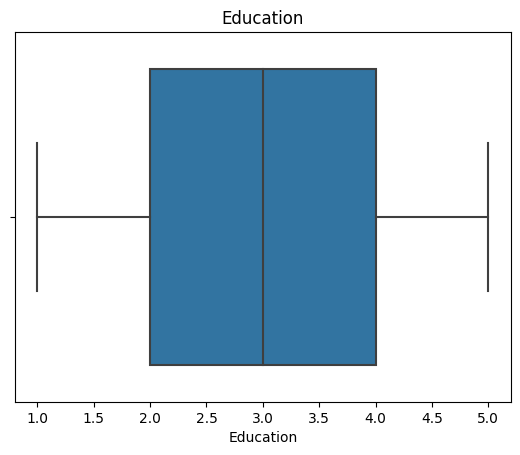

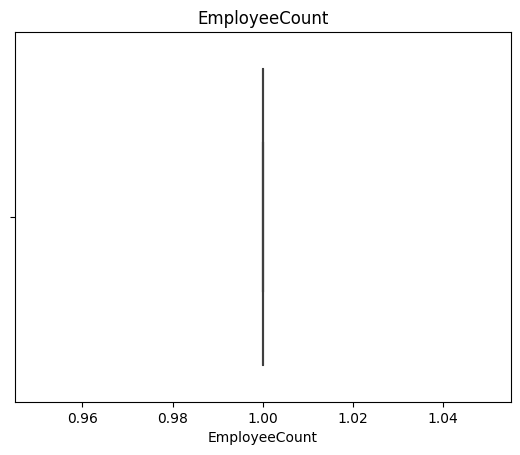

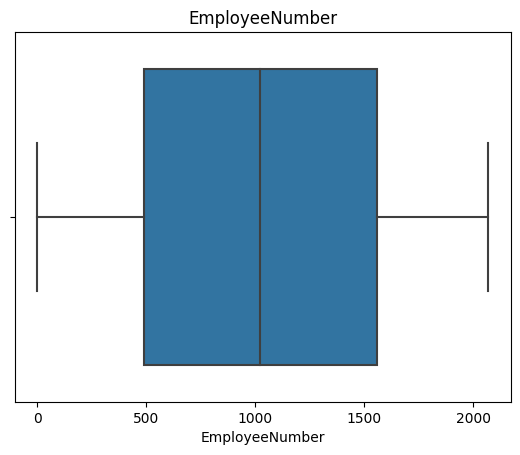

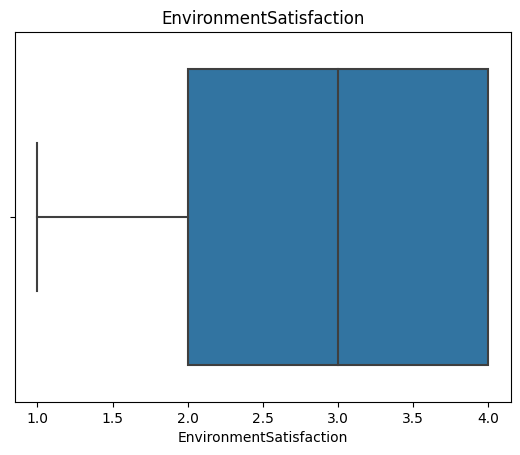

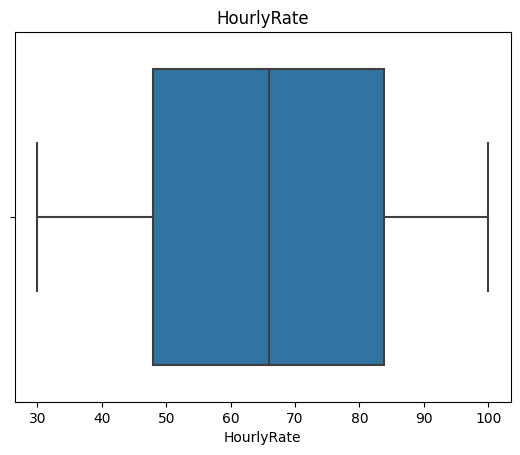

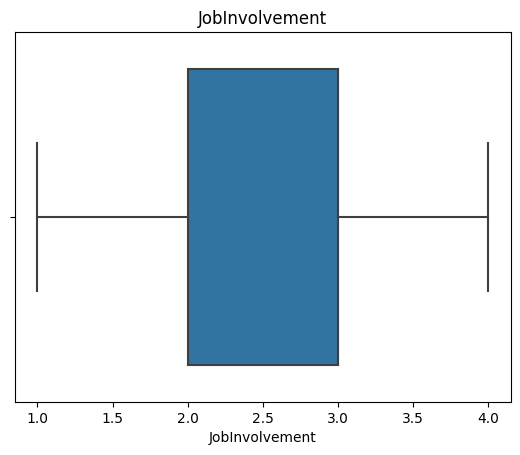

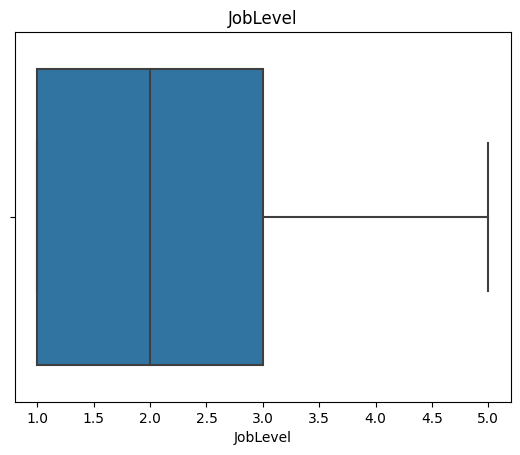

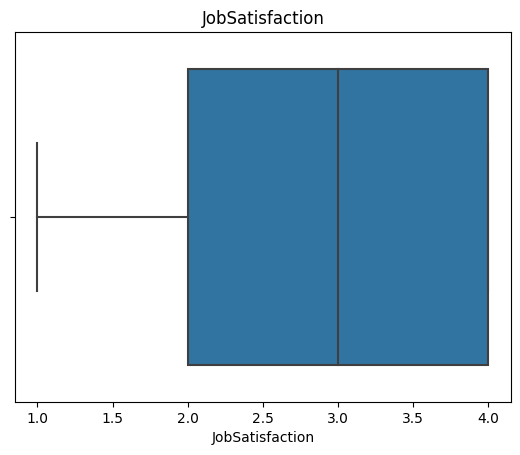

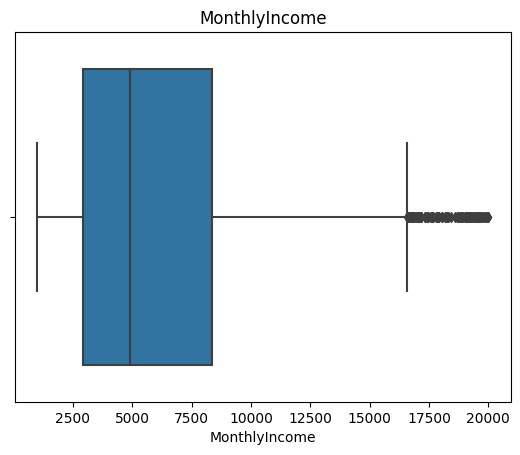

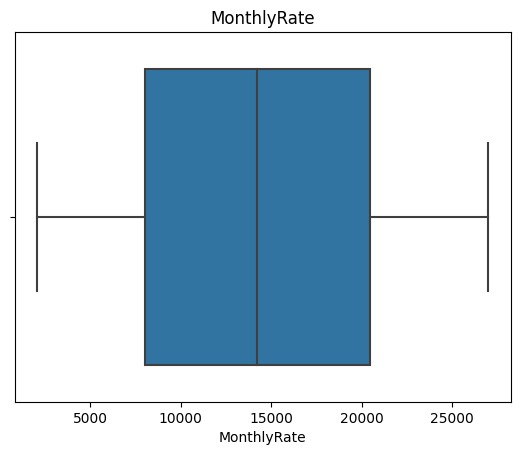

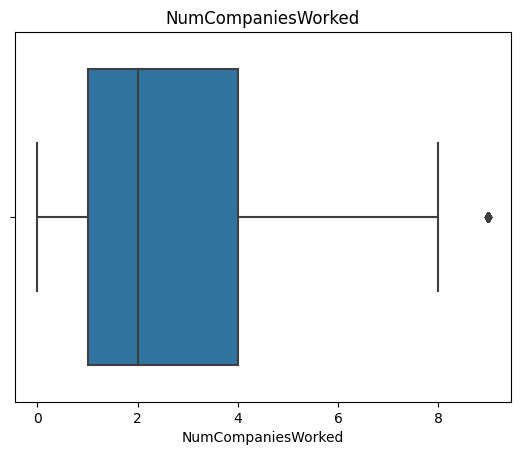

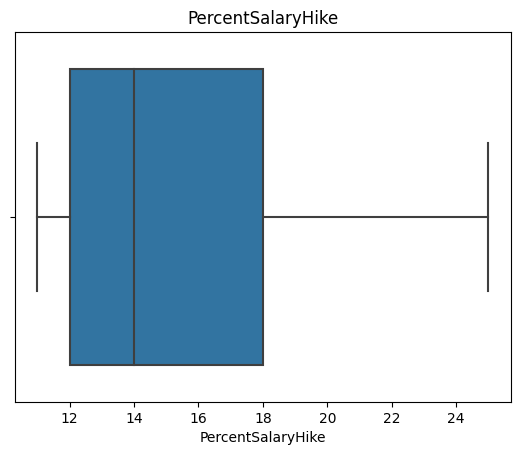

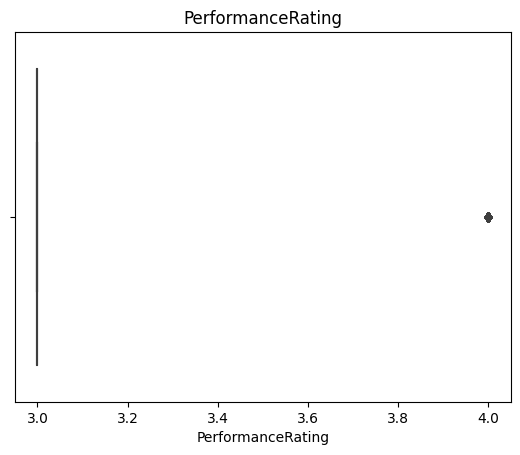

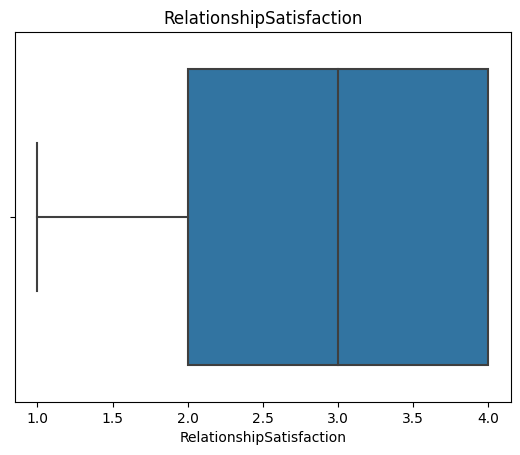

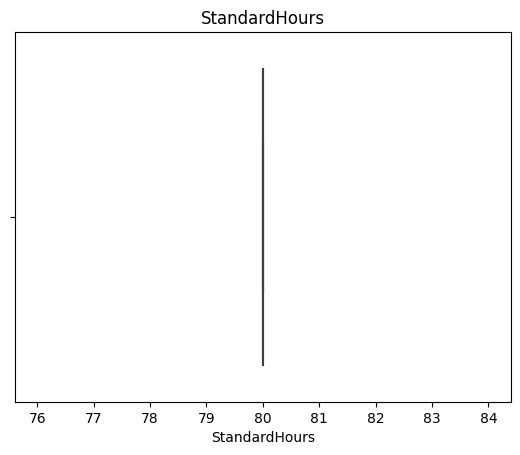

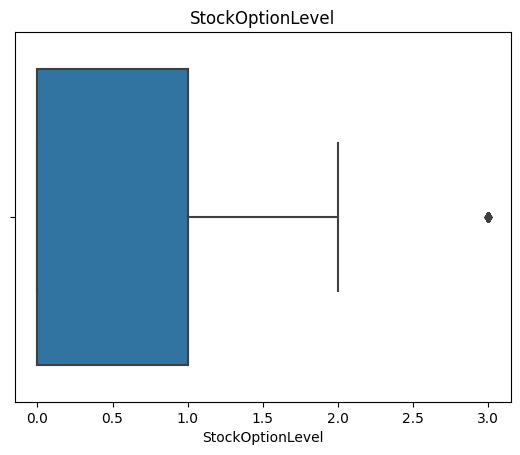

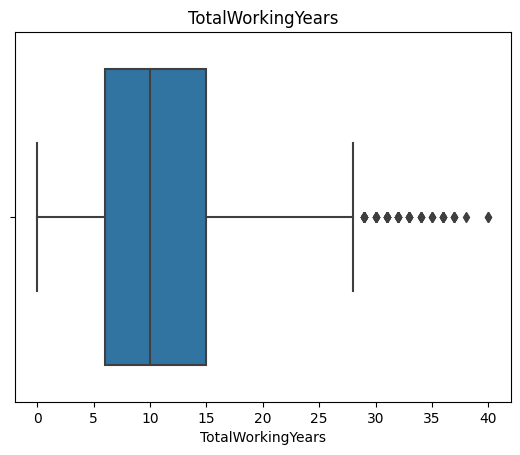

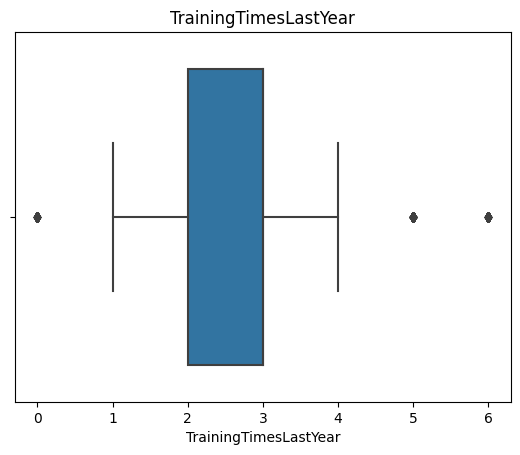

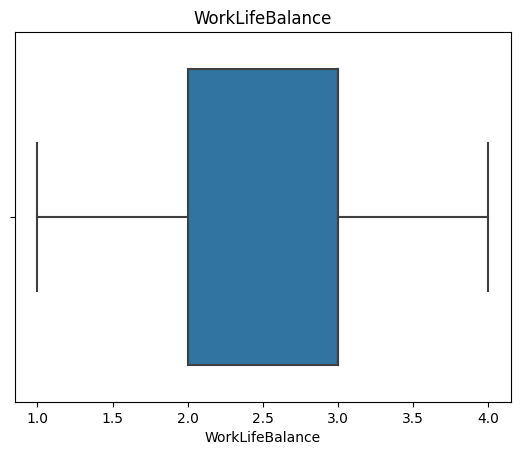

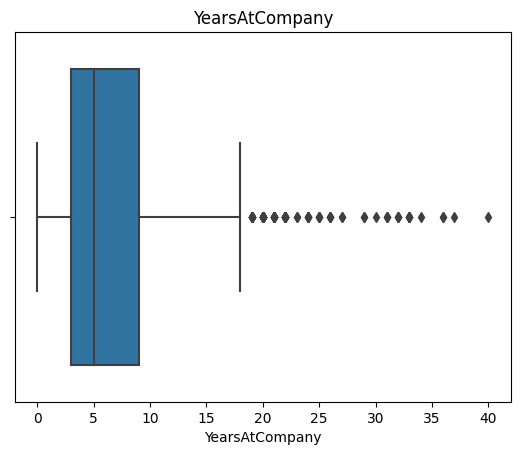

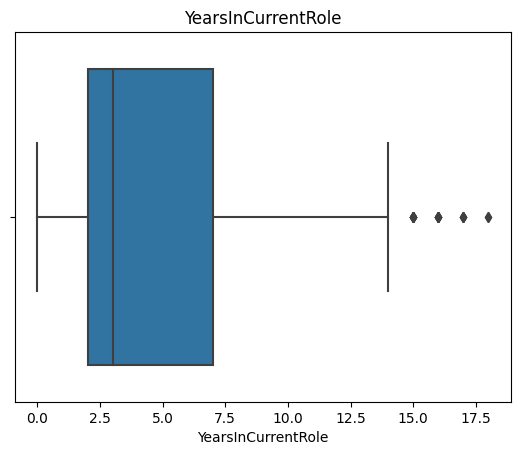

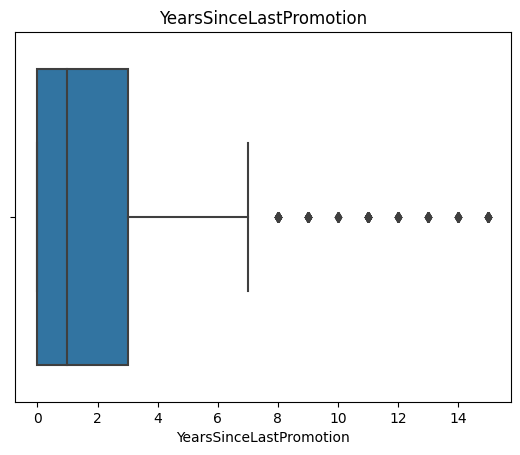

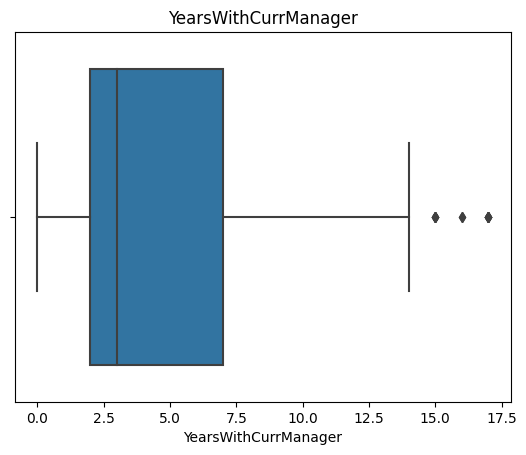

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64'])

# Create boxplots for all numeric columns to check for outliers
for column in numeric_columns:
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.show()

*some outliers for columns: MonthlyIncome, NumCompaniesWorked, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearWithCurrManager

In [12]:
# Drop employee number column and columns with zero variance
df = df.drop(columns=['EmployeeNumber','EmployeeCount','StandardHours','Over18'])

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [14]:
# Convert categorical features to binary
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

df['Gender'].replace('Male',1, inplace=True)
df['Gender'].replace('Female',0, inplace=True)

df['OverTime'].replace('Yes',1, inplace=True)
df['OverTime'].replace('No',0, inplace=True)

In [15]:
# Use OneHotEncoder to convert other categorical features with more than 2 categories
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate the encoded features with the original dataset
df_encoded = pd.concat([df, encoded_features], axis=1)

# Drop the original categorical features
df_encoded.drop(categorical_features, axis=1, inplace=True)

df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,279,8,1,3,1,61,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,1,92,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,0,56,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,1,40,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modeling

In [16]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

import statsmodels.api as sm
X = sm.add_constant(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

         Current function value: 0.286452
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1131
Method:                           MLE   Df Model:                           44
Date:                Thu, 21 Dec 2023   Pseudo R-squ.:                  0.3681
Time:                        21:41:48   Log-Likelihood:                -336.87
converged:                      False   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 1.901e-57
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.6327     25.941     -0.217      0.828     -56.477      45.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score, f1_score

churn_probabilities = result.predict(X_test)
threshold = 0.4
predicted_labels = (churn_probabilities > threshold).astype(int)

'''
[[True Negative  False Positive]
[False Negative True Positive]]
'''
conf_matrix = confusion_matrix(y_test, predicted_labels)

# How many predictions were correct?
accuracy = accuracy_score(y_test, predicted_labels)

# How many employees that were predicted to churn actually churned?
precision = precision_score(y_test, predicted_labels)

# How many churned employees were correctly identified?
recall = recall_score(y_test, predicted_labels)

# How balanced is the trade-off between precision and recall?
f1 = f1_score(y_test, predicted_labels)

# How well does the model distinguish between positive and negative instances?
auc_roc = roc_auc_score(y_test, churn_probabilities)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Confusion Matrix:
[[235  20]
 [ 20  19]]

Accuracy: 0.8639455782312925
Precision: 0.48717948717948717
Recall: 0.48717948717948717
F1 Score: 0.48717948717948717
AUC-ROC: 0.7883358471593765


In [27]:
# Create a DataFrame with employee data and predicted probabilities
results_df = pd.concat([X_test, pd.Series(churn_probabilities, name='ChurnProbability'), pd.Series(predicted_labels, name='PredictedLabel'), pd.Series(y_test, name='ActualLabel')], axis=1)

# Sort by churn probability in descending order
results_df = results_df.sort_values(by='ChurnProbability', ascending=False)

# Display the sorted DataFrame
results_df.head()

,const,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,ChurnProbability,PredictedLabel,ActualLabel
1057,1.0,29,115,13,3,1,0,51,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.929498,1,1
51,1.0,28,1434,5,4,3,1,50,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.869639,1,1
946,1.0,40,299,25,4,4,1,57,2,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.838257,1,1
111,1.0,34,658,7,3,1,1,66,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.822614,1,1
915,1.0,21,251,10,2,1,0,45,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800561,1,1
